***DATA visualization uon Suporting Vector Machine Algorithm***

In [1]:
#Import Library
from sklearn import svm
from sklearn import preprocessing
import pandas as pd
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

#Load Train and Test datasets
#Identify feature and response variable(s) and values must be numeric and numpy arrays
train=pd.read_csv('Personality Survey.csv')
#train_y=train['Loan_Status']
#train_x=train.drop(["Loan_Status"],axis=1)

'''''test=pd.read_csv('test.csv')
test_y=test['Loan_Status']
test_x=test.drop(["Loan_Status"],axis=1)

# Create Linear SVM object
support = svm.LinearSVC(random_state=20)

# Train the model using the training sets and check score on test dataset
#support.fit(train_x, train_y)
#predicted= support.predict(test_x)
#score=accuracy_score(test_y,predicted)
#print("Your Model Accuracy is", score)
#train.to_csv( "pred.csv")'''

'\'\'test=pd.read_csv(\'test.csv\')\ntest_y=test[\'Loan_Status\']\ntest_x=test.drop(["Loan_Status"],axis=1)\n\n# Create Linear SVM object\nsupport = svm.LinearSVC(random_state=20)\n\n# Train the model using the training sets and check score on test dataset\n#support.fit(train_x, train_y)\n#predicted= support.predict(test_x)\n#score=accuracy_score(test_y,predicted)\n#print("Your Model Accuracy is", score)\n#train.to_csv( "pred.csv")'

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import svm


In [3]:
data=pd.read_csv('Personality Survey.csv')


In [4]:
data.head(5)

,Timestamp,Email Address,Do you wish to participate,Are you social,Talkative,Forgetful,organized,Quick to anger,Heroic,Takes Things Personal,...,quick in action,quiet and complacement,likes activities,loves people,innovative,truoble concretrating,delight in change,likes discussions,Enter User Name of your choice,Personality
0,4/26/2024 5:52:04,NaN,Yes,sometimes,sometimes,sometimes,Yes,sometimes,sometimes,sometimes,...,No,sometimes,Yes,sometimes,Yes,sometimes,No,sometimes,NaN,Sanguine
1,4/26/2024 9:06:57,NaN,Yes,sometimes,Yes,Yes,Yes,No,No,sometimes,...,No,Yes,sometimes,Yes,sometimes,No,sometimes,sometimes,NaN,Sanguine
2,4/26/2024 9:48:57,NaN,Yes,Yes,Yes,sometimes,sometimes,Yes,Yes,No,...,Yes,sometimes,Yes,No,Yes,No,No,No,crage,Choleric
3,4/28/2024 20:16:12,NaN,Yes,sometimes,sometimes,sometimes,Yes,sometimes,sometimes,Yes,...,sometimes,sometimes,sometimes,sometimes,Yes,No,Yes,Yes,Tar,Sanguine
4,5/6/2024 12:40,NaN,Yes,Yes,sometimes,sometimes,Yes,No,sometimes,sometimes,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Joram,Melancholic


In [5]:
data.dtypes

Timestamp                          object
Email Address                     float64
Do you wish to participate         object
Are you social                     object
Talkative                          object
Forgetful                          object
organized                          object
Quick to anger                     object
Heroic                             object
Takes Things Personal              object
Poetic & Analytical                object
like to be alone                   object
hard to motivate                   object
likes comfort                      object
Avoid crisis                       object
Peacemaker                         object
Thoughtful and reserved            object
Sometimes Anxious                  object
Quick to judge                     object
Demanding and agressive            object
fearful                            object
devoted and compassionate          object
appears lazy                       object
relaxed and peaceful              

In [6]:
data.shape


(12, 37)

### Feature Selection

In [7]:
data1 = data[["Enter User Name of your choice","loves people","hard to motivate","Avoid crisis","Are you social","Talkative","Forgetful","organized","Quick to judge","like to be alone","Personality"]]

In [9]:
data1.head()

,Enter User Name of your choice,loves people,hard to motivate,Avoid crisis,Are you social,Talkative,Forgetful,organized,Quick to judge,like to be alone,Personality
0,NaN,sometimes,No,sometimes,sometimes,sometimes,sometimes,Yes,No,Yes,Sanguine
1,NaN,Yes,sometimes,Yes,sometimes,Yes,Yes,Yes,sometimes,Yes,Sanguine
2,crage,No,Yes,No,Yes,Yes,sometimes,sometimes,Yes,No,Choleric
3,Tar,sometimes,No,sometimes,sometimes,sometimes,sometimes,Yes,sometimes,Yes,Sanguine
4,Joram,Yes,No,Yes,Yes,sometimes,sometimes,Yes,No,sometimes,Melancholic


In [10]:
data2 = data[["Enter User Name of your choice","loves people","hard to motivate","Avoid crisis","Are you social","Talkative","Forgetful","organized","Quick to judge","like to be alone","Personality"]]

In [11]:
data2

,Enter User Name of your choice,loves people,hard to motivate,Avoid crisis,Are you social,Talkative,Forgetful,organized,Quick to judge,like to be alone,Personality
0,NaN,sometimes,No,sometimes,sometimes,sometimes,sometimes,Yes,No,Yes,Sanguine
1,NaN,Yes,sometimes,Yes,sometimes,Yes,Yes,Yes,sometimes,Yes,Sanguine
2,crage,No,Yes,No,Yes,Yes,sometimes,sometimes,Yes,No,Choleric
3,Tar,sometimes,No,sometimes,sometimes,sometimes,sometimes,Yes,sometimes,Yes,Sanguine
4,Joram,Yes,No,Yes,Yes,sometimes,sometimes,Yes,No,sometimes,Melancholic
5,Zanamwe,Yes,No,Yes,sometimes,sometimes,Yes,Yes,sometimes,sometimes,Sanguine
6,MAINODZA,Yes,sometimes,Yes,sometimes,Yes,No,Yes,No,No,Melancholic
7,Tripoli,Yes,No,sometimes,sometimes,No,sometimes,sometimes,No,Yes,Phlegmatic
8,Sir Elder,Yes,No,sometimes,Yes,No,No,Yes,No,sometimes,Phlegmatic
9,Anold,Yes,Yes,sometimes,Yes,Yes,No,Yes,Yes,Yes,Melancholic


In [12]:
data1.shape


(12, 11)

In [18]:
data2.rename(columns={'Enter User Name of your choice': 'Name'}, inplace=True)


In [19]:
data2.head()

,Name,loves people,hard to motivate,Avoid crisis,Are you social,Talkative,Forgetful,organized,Quick to judge,like to be alone,Personality
0,NaN,sometimes,No,sometimes,sometimes,sometimes,sometimes,Yes,No,Yes,Sanguine
1,NaN,Yes,sometimes,Yes,sometimes,Yes,Yes,Yes,sometimes,Yes,Sanguine
2,crage,No,Yes,No,Yes,Yes,sometimes,sometimes,Yes,No,Choleric
3,Tar,sometimes,No,sometimes,sometimes,sometimes,sometimes,Yes,sometimes,Yes,Sanguine
4,Joram,Yes,No,Yes,Yes,sometimes,sometimes,Yes,No,sometimes,Melancholic


In [20]:
data1.rename(columns={'Enter User Name of your choice': 'Name'}, inplace=True)


In [21]:
data1.head()

,Name,loves people,hard to motivate,Avoid crisis,Are you social,Talkative,Forgetful,organized,Quick to judge,like to be alone,Personality
0,NaN,sometimes,No,sometimes,sometimes,sometimes,sometimes,Yes,No,Yes,Sanguine
1,NaN,Yes,sometimes,Yes,sometimes,Yes,Yes,Yes,sometimes,Yes,Sanguine
2,crage,No,Yes,No,Yes,Yes,sometimes,sometimes,Yes,No,Choleric
3,Tar,sometimes,No,sometimes,sometimes,sometimes,sometimes,Yes,sometimes,Yes,Sanguine
4,Joram,Yes,No,Yes,Yes,sometimes,sometimes,Yes,No,sometimes,Melancholic


In [22]:
data2 = data2.drop("Name",1)

In [23]:
data2.head() 

,loves people,hard to motivate,Avoid crisis,Are you social,Talkative,Forgetful,organized,Quick to judge,like to be alone,Personality
0,sometimes,No,sometimes,sometimes,sometimes,sometimes,Yes,No,Yes,Sanguine
1,Yes,sometimes,Yes,sometimes,Yes,Yes,Yes,sometimes,Yes,Sanguine
2,No,Yes,No,Yes,Yes,sometimes,sometimes,Yes,No,Choleric
3,sometimes,No,sometimes,sometimes,sometimes,sometimes,Yes,sometimes,Yes,Sanguine
4,Yes,No,Yes,Yes,sometimes,sometimes,Yes,No,sometimes,Melancholic


## spliting Data into training and testing data

In [20]:
#X_train, X_test, y_train, y_test = train_test_split(data2.drop("Personality",1),data2["Personality"], test_size=0.2, random_state=2)

In [21]:
#X_train

,loves people,hard to motivate,Avoid crisis,Are you social,Talkative,Forgetful,organized,Quick to judge,like to be alone
7,Yes,No,sometimes,sometimes,No,sometimes,sometimes,No,Yes
1,Yes,sometimes,Yes,sometimes,Yes,Yes,Yes,sometimes,Yes
10,Yes,sometimes,Yes,sometimes,sometimes,No,Yes,No,Yes
0,sometimes,No,sometimes,sometimes,sometimes,sometimes,Yes,No,Yes
3,sometimes,No,sometimes,sometimes,sometimes,sometimes,Yes,sometimes,Yes
2,No,Yes,No,Yes,Yes,sometimes,sometimes,Yes,No
6,Yes,sometimes,Yes,sometimes,Yes,No,Yes,No,No
11,Yes,No,Yes,Yes,Yes,Yes,No,No,No
8,Yes,No,sometimes,Yes,No,No,Yes,No,sometimes


In [22]:
#y_train

In [25]:
# Make predictions on the testing data
#y_pred = clf.predict(X_test)


In [26]:
# Evaluate the accuracy of the classifier
#accuracy = accuracy_score(y_test, y_pred)
#print("Accuracy:", accuracy)


Encoding

In [24]:
#one Hot Encoding
'''encoded_data = pd.get_dummies(data2, columns["loves people","hard to motivate","Avoid crisis","Are you social","Talkative ","Forgetful ","organized ","Quick to judge ","like to be alone","Personality "])
encoded_data'''

'encoded_data = pd.get_dummies(data2, columns["loves people","hard to motivate","Avoid crisis","Are you social","Talkative ","Forgetful ","organized ","Quick to judge ","like to be alone","Personality "])\nencoded_data'

In [28]:
#Label Encoding
# Import label encoder 
from sklearn import preprocessing
# label_encoder object knows how to understand word labels. 
#label_encoder = preprocessing.LabelEncoder()



In [29]:
# Encode labels in column 'Country'. 
#data2[["loves people","hard to motivate","Avoid crisis","Are you social","Talkative","Forgetful","organized","Quick to judge","like to be alone","Personality"]]= label_encoder.fit_transform(data2[["loves people","hard to motivate","Avoid crisis","Are you social","Talkative","Forgetful","organized","Quick to judge","like to be alone","Personality"]]) 
#print(data2.head())

In [25]:
#label encoding

# Create a LabelEncoder instance
encoder = preprocessing.LabelEncoder()

# Iterate over each column and perform label encoding
for colum in data2.columns:
    data2[colum] = encoder.fit_transform(data2[colum].astype(str))

In [26]:
data2.shape

(12, 10)

In [27]:
data2.dtypes

loves people        int32
hard to motivate    int32
Avoid crisis        int32
Are you social      int32
Talkative           int32
Forgetful           int32
organized           int32
Quick to judge      int32
like to be alone    int32
Personality         int32
dtype: object

# Algorithm selection

#### SVM Algorithm

In [28]:
X_train, X_test, y_train, y_test = train_test_split(data2.drop("Personality",1),data2["Personality"], test_size=0.09, random_state=2)

In [29]:
# Create Linear SVM object
support = svm.LinearSVC(random_state=8)


In [30]:
# Train the model using the training sets 
support.fit(X_train, y_train)


LinearSVC(random_state=8)

In [31]:
# Create a decision tree classifier
clf = DecisionTreeClassifier()


In [32]:
# Train the classifier on the training data
clf.fit(X_train, y_train)


DecisionTreeClassifier()

#### Predicting  

In [33]:
#predicting using the Sopprting Vector Machine
predicted= support.predict(X_test)


In [34]:
#prediction using the Decision Tree Classifier
predicted1= clf.predict(X_test)


In [35]:
#Decision Tree Classifier Prediction
score=accuracy_score(y_test,predicted)
print("Your Model Accuracy is", score)
#rain.to_csv( "pred.csv")

Your Model Accuracy is 0.5


In [36]:
#Prediction for Supporting Vector machine
score=accuracy_score(y_test,predicted1)
print("Your Model Accuracy is", score)
#rain.to_csv( "pred.csv")

Your Model Accuracy is 0.5


### Defining GradientBoost classifier

In [37]:
# Import all relevant libraries
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score, confusion_matrix  

In [38]:
# Define Gradient Boosting Classifier with hyperparameters
gboostclass = GradientBoostingClassifier(n_estimators=500,learning_rate=0.05,random_state=10,max_features=5 )


In [39]:
# Fit train data to GBC

gboostclass.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.05, max_features=5, n_estimators=500,
                           random_state=10)

In [40]:
predicted2 = gboostclass.predict(X_test)


In [41]:
score=accuracy_score(y_test,predicted2)
print("Your Model Accuracy is", score)

Your Model Accuracy is 1.0


In [42]:
# Confusion matrix will give number of correct and incorrect classifications
print(confusion_matrix(y_test, gboostclass.predict(X_test)))

[[1 0]
 [0 1]]


In [43]:
# Confusion matrix will give number of correct and incorrect classifications
print(confusion_matrix(y_test, clf.predict(X_test)))

[[0 1]
 [0 1]]


In [44]:
# Confusion matrix will give number of correct and incorrect classifications
print(confusion_matrix(y_test, support.predict(X_test)))

[[0 1 0]
 [0 0 0]
 [0 0 1]]


In [45]:

print("SVM accuracy is %2.2f" % accuracy_score( 
     y_test, support.predict(X_test)))


SVM accuracy is 0.50


In [46]:

print("Decision Tree Classifier accuracy is %2.2f" % accuracy_score( 
     y_test, clf.predict(X_test)))


Decision Tree Classifier accuracy is 0.50


In [47]:

print("SVM accuracy is %2.2f" % accuracy_score( 
     y_test, gboostclass.predict(X_test)))


SVM accuracy is 1.00


In [48]:
#classification report for gradiebtBoost Classifier
from sklearn.metrics import classification_report
pred=gboostclass.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



In [49]:
#classification report report for Decision Tree Classifier
from sklearn.metrics import classification_report
pred=clf.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           3       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



In [50]:
#classification report for Support Vector Mechine
from sklearn.metrics import classification_report
pred=support.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         0
           3       1.00      1.00      1.00         1

    accuracy                           0.50         2
   macro avg       0.33      0.33      0.33         2
weighted avg       0.50      0.50      0.50         2



In [61]:
pip install wordcloud


Note: you may need to restart the kernel to use updated packages.


In [63]:
!pip install matplotlib



In [51]:
data2


,loves people,hard to motivate,Avoid crisis,Are you social,Talkative,Forgetful,organized,Quick to judge,like to be alone,Personality
0,2,0,2,1,2,2,1,0,1,3
1,1,2,1,1,1,1,1,2,1,3
2,0,1,0,0,1,2,2,1,0,0
3,2,0,2,1,2,2,1,2,1,3
4,1,0,1,0,2,2,1,0,2,1
5,1,0,1,1,2,1,1,2,2,3
6,1,2,1,1,1,0,1,0,0,1
7,1,0,2,1,0,2,2,0,1,2
8,1,0,2,0,0,0,1,0,2,2
9,1,1,2,0,1,0,1,1,1,1


In [86]:
#Error
# Model training
#data2.fit(X_train,y_train)
#data2_scaled.fit(X_train_scaled,y_train)



In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(data2.drop("Personality",1),data2["Personality"], test_size=0.1, random_state=2)

#X_train, X_test_, y_train, y_test = train_test_split(data2.drop("Personality",1),data2["Personality"], test_size=0.1, random_state=2)

In [53]:
'''from sklearn.tree import DecisionTreeClassifier

data3 = DecisionTreeClassifier()
data3_scaled = DecisionTreeClassifier()

data3.fit(X_train,y_train)
data3_scaled.fit(X_train_scaled,y_train)

y_pred = data3.predict(X_test)
y_pred_scaled = data3_scaled.predict(X_test_scaled)

print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scaled))'''

from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

In [52]:
# Fit the scaled training data to the 'data3_scaled' model
data3_scaled.fit(X_train_scaled, y_train)

NameError: name 'data3_scaled' is not defined

In [109]:
# Make predictions on the scaled test data
y_pred = data3_scaled.predict(X_test_scaled)


In [110]:
y_pred

array([2, 3])

In [108]:
print("Scaled",accuracy_score(y_test,y_pred))
print("Actual",accuracy_score(y_test,y_pred))


Scaled 1.0
Actual 1.0


In [112]:
# Make predictions on the scaled test data using the 'data3_scaled' model
#y_pred_scaled = data3_scaled.predict(X_test_scaled)

In [113]:
# Make predictions on the original test data using the 'data3' model
#y_pred = data3.predict(X_test)

In [54]:
# Fit the scaled training data to the 'data3_scaled' model
data3_scaled.fit(X_train_scaled, y_train)

# Make predictions on the scaled test data using the 'data3_scaled' model
y_pred_scaled = data3_scaled.predict(X_test_scaled)

NameError: name 'data3_scaled' is not defined

In [115]:
score=accuracy_score(y_test,y_pred_scaled)
print("Your Model Accuracy is", score)

Your Model Accuracy is 0.5


#### Creating a pickle file for our Model 

In [55]:
#Make a pickle file for my model
import pickle

pickle.dump(clf,open("personality.pkl","wb"))

# visualization

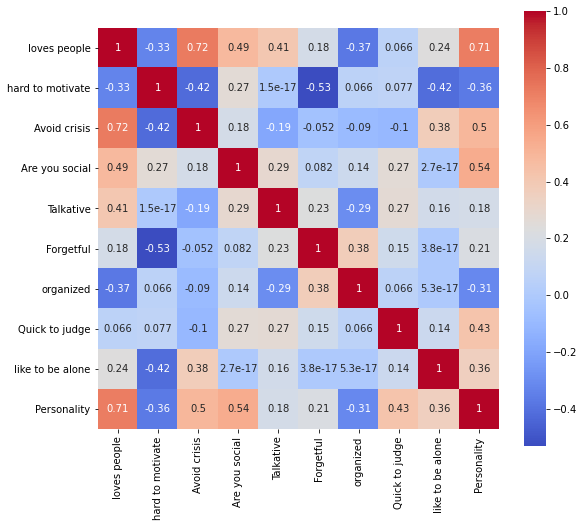

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
#data2 = sns.load_dataset("flights")

# Create a figure with the desired size
fig, ax = plt.subplots(figsize=(9, 8))

# Create the heatmap
sns.heatmap(data2.corr(), annot=True, cmap='coolwarm', square=True, ax=ax)

# Show the plot
plt.show()



In [92]:
data2.corr()

,loves people,hard to motivate,Avoid crisis,Are you social,Talkative,Forgetful,organized,Quick to judge,like to be alone,Personality
loves people,1.000000,-3.314968e-01,0.722806,4.857143e-01,4.098780e-01,1.797491e-01,-3.714286e-01,0.066299,2.390457e-01,0.714286
hard to motivate,-0.331497,1.000000e+00,-0.419314,2.651974e-01,1.508496e-17,-5.308593e-01,6.629935e-02,0.076923,-4.160251e-01,-0.364646
Avoid crisis,0.722806,-4.193139e-01,1.000000,1.807016e-01,-1.851640e-01,-5.167424e-02,-9.035079e-02,-0.104828,3.779645e-01,0.496929
Are you social,0.485714,2.651974e-01,0.180702,1.000000e+00,2.927700e-01,8.170415e-02,1.428571e-01,0.265197,2.653941e-17,0.542857
Talkative,0.409878,1.508496e-17,-0.185164,2.927700e-01,1.000000e+00,2.344211e-01,-2.927700e-01,0.271746,1.632993e-01,0.175662
Forgetful,0.179749,-5.308593e-01,-0.051674,8.170415e-02,2.344211e-01,1.000000e+00,3.758391e-01,0.151674,3.794664e-17,0.212431
organized,-0.371429,6.629935e-02,-0.090351,1.428571e-01,-2.927700e-01,3.758391e-01,1.000000e+00,0.066299,5.307881e-17,-0.314286
Quick to judge,0.066299,7.692308e-02,-0.104828,2.651974e-01,2.717465e-01,1.516741e-01,6.629935e-02,1.000000,1.386750e-01,0.430946
like to be alone,0.239046,-4.160251e-01,0.377964,2.653941e-17,1.632993e-01,3.794664e-17,5.307881e-17,0.138675,1.000000e+00,0.358569
Personality,0.714286,-3.646464e-01,0.496929,5.428571e-01,1.756620e-01,2.124308e-01,-3.142857e-01,0.430946,3.585686e-01,1.000000
